## Import Libraries

In [65]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy as sp
import sklearn
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Importing Dataset

In [23]:
DiagnosisResult = pd.read_csv('breast-cancer-wisconsin-data_data.csv')
DiagnosisResult.isnull().sum()
DiagnosisResult.duplicated().sum()

#print(DiagnosisResult)

0

## Encoding Target feature using Label Encoding

In [25]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
DiagnosisResult['diagnosis']= label_encoder.fit_transform(DiagnosisResult['diagnosis']) 

DiagnosisResult['diagnosis'].unique() 

#print(DiagnosisResult)  #(GeeksforGeeks, 2023)

array([1, 0], dtype=int64)

## Checking for Class Imbalance

diagnosis
0    357
1    212
Name: count, dtype: int64


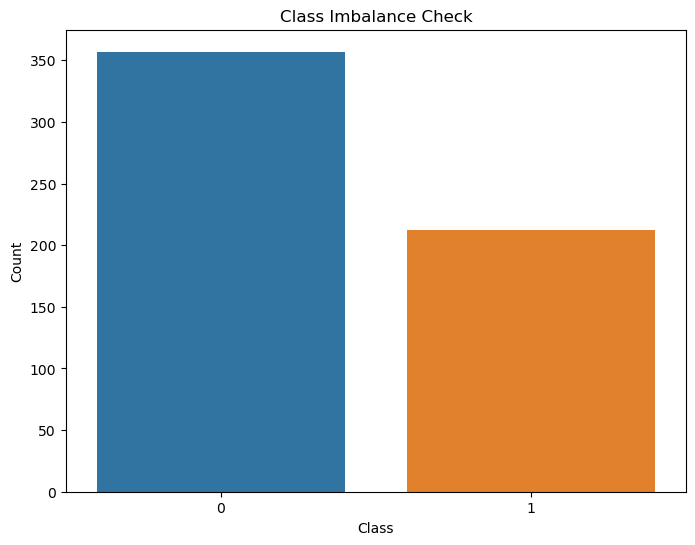

In [48]:
#print(Traits)
#print(Diagnosis)

ClassCounts = DiagnosisResult['diagnosis'].value_counts()
print(ClassCounts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=ClassCounts.index, y=ClassCounts.values)

plt.title('Class Imbalance Check')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()


## Identifying and Dropping Outliers

In [71]:
import numpy as np
from scipy import stats

# Calculate the Z-scores
z_scores = np.abs(stats.zscore(DiagnosisResult))

# Filter out the outliers
DiagnosisResult_no_outliers = DiagnosisResult[(z_scores < 3).all(axis=1)]
#print(DiagnosisResult_no_outliers)

## Scaling the Dataset

In [72]:
Traits = DiagnosisResult_no_outliers.drop(columns=['id','diagnosis']) 
Diagnosis = DiagnosisResult_no_outliers['diagnosis']  # Target variable

#print(Traits)
#print(Diagnosis)


# Fit scaler on training data
scaler = MinMaxScaler()
# Transform training data
ScaledTraits = scaler.fit_transform(Traits)

# Transform testing data
#X_test= scaler.transform(X_test)

print(ScaledTraits)
print(ScaledTraits.shape)
print(Diagnosis.shape)

#Traits.corr()

[[0.83424397 0.38362684 0.82273105 ... 0.68863384 0.3717064  0.42980015]
 [0.78021978 0.54926226 0.79595605 ... 0.89966679 0.64240903 0.41158614]
 [0.81705445 0.22037125 0.84304312 ... 0.60162903 0.25062735 0.27498103]
 ...
 [0.89502118 0.60352213 0.90674915 ... 0.82043688 0.15526976 0.20376929]
 [0.80723187 0.88243693 0.80703536 ... 0.60273973 0.31587202 0.14330888]
 [0.59052121 0.87434555 0.59560521 ... 0.52499074 0.20483061 0.29294207]]
(487, 30)
(487,)


## APPLYING SMOTE AND SPLITTING DATA

In [73]:
# Apply SMOTE
smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(ScaledTraits, Diagnosis)

#Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

#checking the shape of the different test and train parameters
#print('Original Data shape', DiagnosisResult)
print('The shape of Traits is:', ScaledTraits)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

print("Post OverSampling, label count '1': {}".format(sum(y_train == 1))) 
print("Post OverSampling, label count '0': {}".format(sum(y_train == 0))) 

#(GeeksforGeeks, 2024), (Tang, 2023)


The shape of Traits is: [[0.83424397 0.38362684 0.82273105 ... 0.68863384 0.3717064  0.42980015]
 [0.78021978 0.54926226 0.79595605 ... 0.89966679 0.64240903 0.41158614]
 [0.81705445 0.22037125 0.84304312 ... 0.60162903 0.25062735 0.27498103]
 ...
 [0.89502118 0.60352213 0.90674915 ... 0.82043688 0.15526976 0.20376929]
 [0.80723187 0.88243693 0.80703536 ... 0.60273973 0.31587202 0.14330888]
 [0.59052121 0.87434555 0.59560521 ... 0.52499074 0.20483061 0.29294207]]
The shape of X_test is: (197, 30)
The shape of y_train is: (457,)
The shape of y_test is: (197,)
Post OverSampling, label count '1': 226
Post OverSampling, label count '0': 231


## PCA

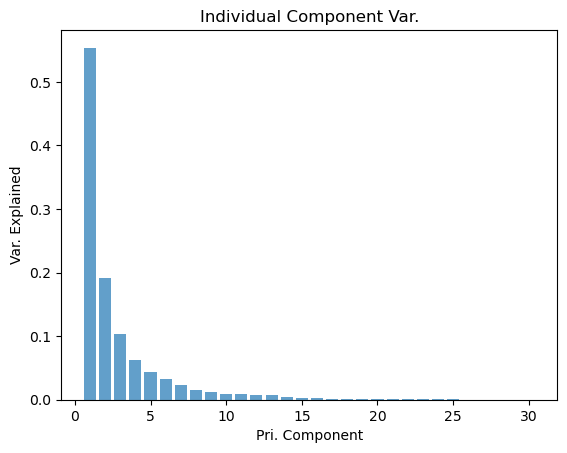

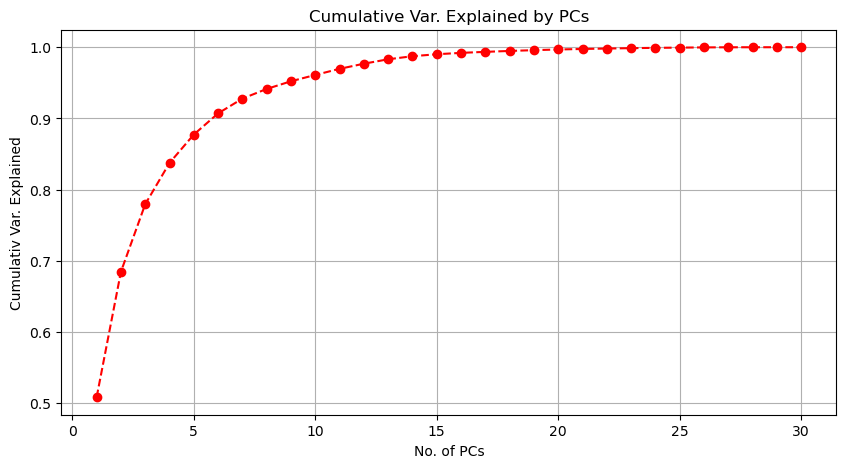

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()


X_train = pca.fit_transform(X_train)

# Individual component variance
ind_var = pca.explained_variance_

# Cumulative variance
cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot individual component variance
plt.figure()
plt.bar(range(1, len(ind_var) + 1), ind_var, alpha=0.7)
plt.xlabel('Pri. Component')
plt.ylabel('Var. Explained')
plt.title('Individual Component Var.')
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, marker='o', 
         linestyle='--', color='r')
plt.xlabel('No. of PCs')
plt.ylabel('Cumulativ Var. Explained')
plt.title('Cumulative Var. Explained by PCs')
plt.grid()
plt.show()

X_test = pca.transform(X_test)

## Model training and testing

## Random forest

<Figure size 640x480 with 0 Axes>

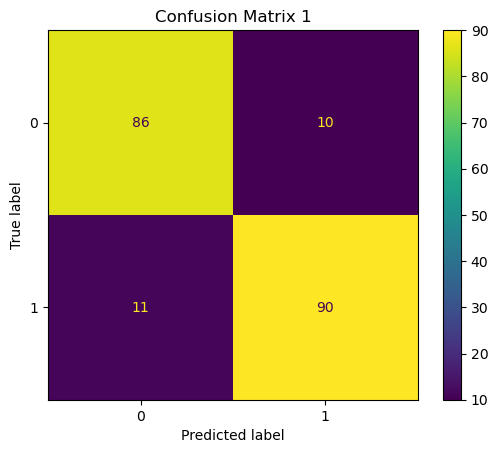

<Figure size 640x480 with 0 Axes>

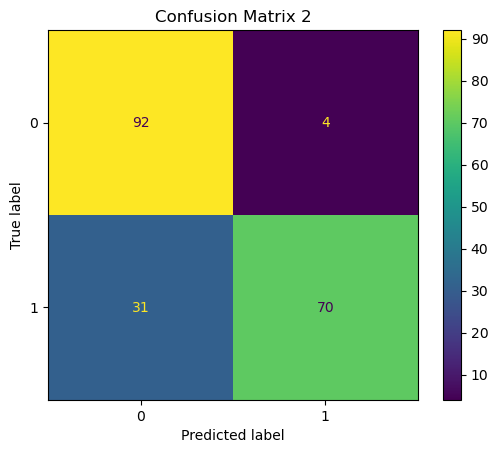

<Figure size 640x480 with 0 Axes>

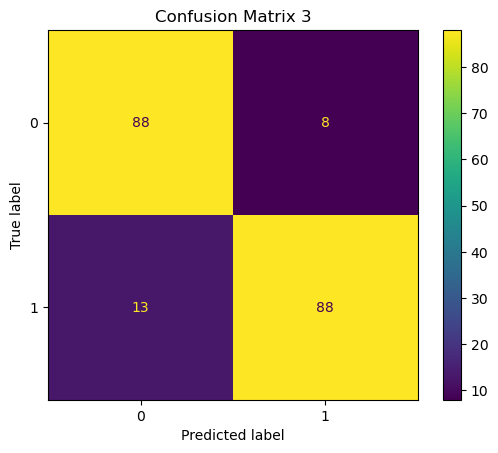

<Figure size 640x480 with 0 Axes>

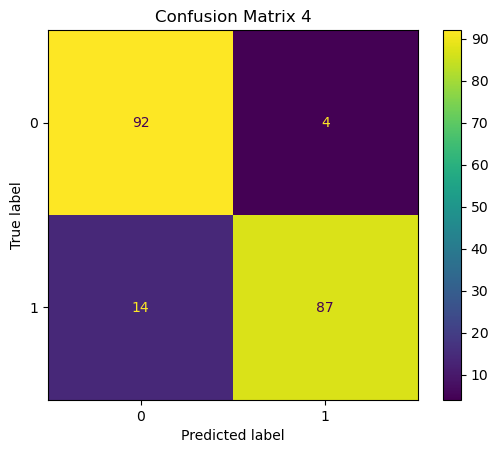

<Figure size 640x480 with 0 Axes>

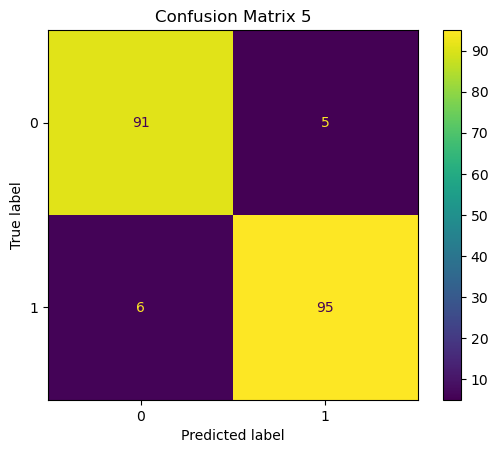

[0.9671772428884027, 0.9474835886214442, 0.986870897155361, 0.9934354485776805, 0.9978118161925602]
[0.8934010152284264, 0.8223350253807107, 0.8934010152284264, 0.9086294416243654, 0.9441624365482234]


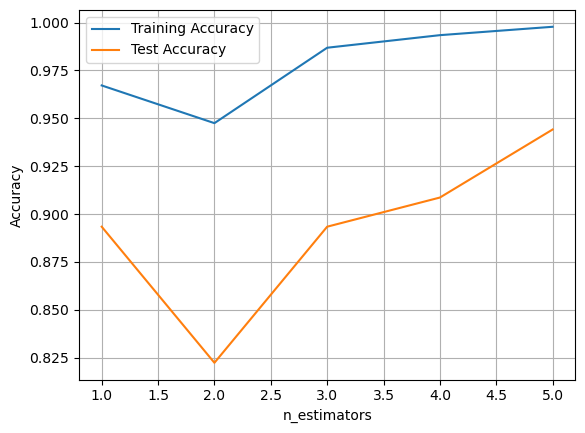

In [78]:
from sklearn.ensemble import RandomForestClassifier

  
training_accuracy = []
test_accuracy = []

estimators_settings = range(1,6)
for n in estimators_settings:
    #building the model
    forest = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=3)
    forest.fit(X_train, y_train)
    
    #record the training and test set accuracy
    training_accuracy.append(forest.score(X_train, y_train))
    test_accuracy.append(forest.score(X_test, y_test))
    
    #plotting confusion matrix for each n_neigbhour parameter
    predicted = forest.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    # Plot
    plt.figure()  
    met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    met.plot()
    plt.title(f'Confusion Matrix {n}')
    plt.show()

plt.plot(estimators_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(estimators_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Accuracy'),
plt.xlabel('n_estimators')
plt.grid()
plt.legend()

print(training_accuracy)
print(test_accuracy)

## Gradient Boost

<Figure size 640x480 with 0 Axes>

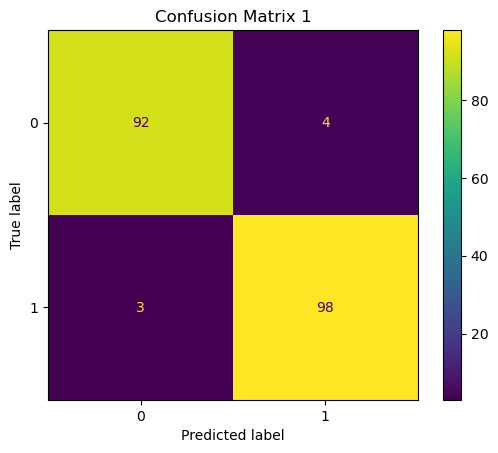

<Figure size 640x480 with 0 Axes>

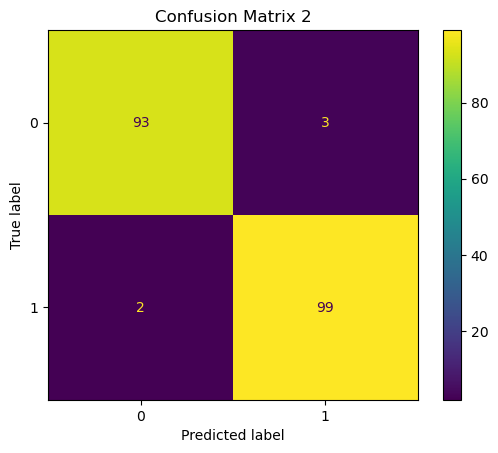

<Figure size 640x480 with 0 Axes>

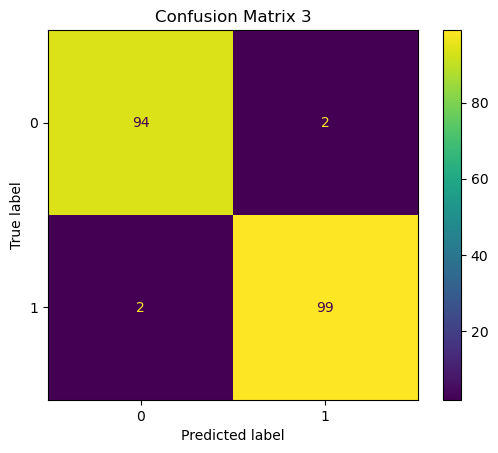

<Figure size 640x480 with 0 Axes>

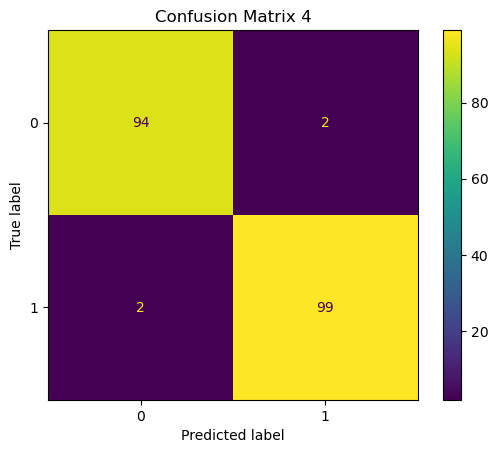

<Figure size 640x480 with 0 Axes>

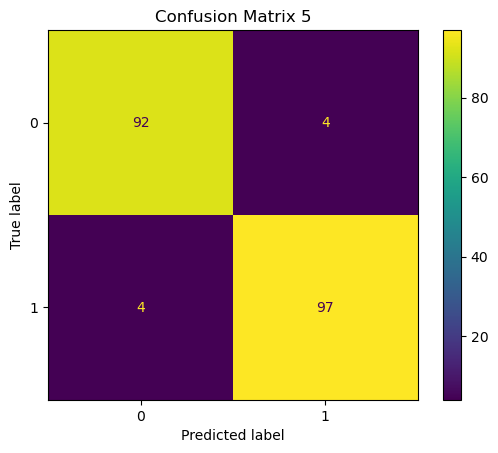

[0.9644670050761421, 0.9746192893401016, 0.9796954314720813, 0.9796954314720813, 0.9593908629441624]


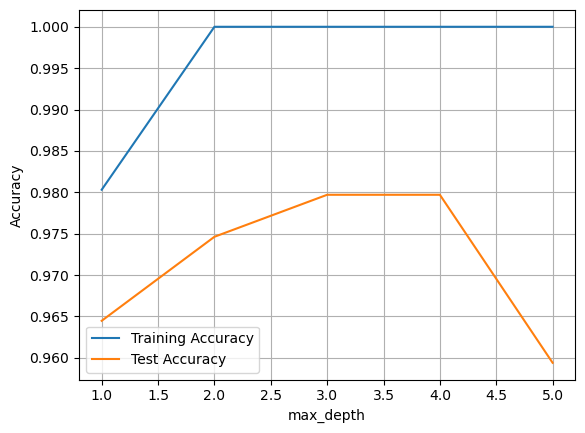

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
  
training_accuracy = []
test_accuracy = []


parameters_settings = range(1,6)
for n in parameters_settings:
    #building the model
    gbrt = GradientBoostingClassifier(max_depth=n, random_state=2)
    gbrt.fit(X_train, y_train)
    
    #record the training and test set accuracy
    training_accuracy.append(gbrt.score(X_train, y_train))
    test_accuracy.append(gbrt.score(X_test, y_test))
    
    #plotting confusion matrix for each n_neigbhour parameter
    predicted = gbrt.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    # Plot
    plt.figure()  
    met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    met.plot()
    plt.title(f'Confusion Matrix {n}')
    plt.show()

plt.plot(parameters_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(parameters_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Accuracy'),
plt.xlabel('max_depth')
plt.grid()
plt.legend()

print(test_accuracy)